In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

def build_density_facetwrap(somedf, colName, valName, wrapAmount, yourTitle):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(somedf,col=colName, hue=colName, col_wrap=wrapAmount, palette=pal)
    # Draw the densities in a few steps
    g.map(sns.kdeplot, valName, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, valName, clip_on=False, color="w", lw=0.5, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .4, label, fontweight="bold", color=color, 
                ha="left", va="center", transform=ax.transAxes)
        plt.xlabel('Change ($/day)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    g.map(label, "change")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=0)

    # Remove axes details that don't play will with overlap 
    g.set_titles("")
    g.fig.suptitle(yourTitle, fontsize=32)
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(top=.8)
    g.add_legend()
    

In [10]:
stock_data = pd.read_csv('Data/all_stocks_5yr.csv')
stock_data['change'] = stock_data['close'] - stock_data['open']
stock_data['percent_change'] =  stock_data['change'] / stock_data['close']
np.count_nonzero(~np.isnan(stock_data['percent_change']))

619029

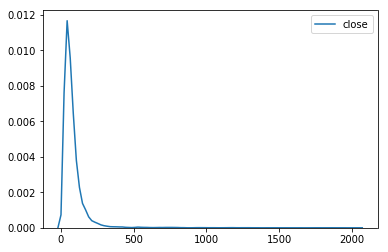

In [11]:
sns.kdeplot(stock_data['close'])

In [ ]:
build_density_facetwrap(stock_data,"Name","change",5,"Top 10 Closers Change Spread in 2016")